# 고객 등급 변동 - Frequency

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')
# import missingno
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import accuracy_score

from matplotlib import font_manager, rc
# font_path = "dataset/malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

In [ ]:
# 가을14, 15년도 데이터 전체에 고객마다 라벨값을 추가한 데이터 read
df = pd.read_pickle('dataset/full_data_with_label_FINAL.pkl')

In [ ]:
df.groupby('CUSTNO').sum()

,PURCHTIME,CLASSCODEL,PURCHAMOUNT,Year,spent_less,14purchase,15purchase
CUSTNO,,,,,,,
00001,650,191,9336600,90654,0,4860810,4475790
00002,548,218,13484940,78563,39,6558370,6926570
00004,261,105,1961650,36260,0,1135170,826480
00006,517,364,2428700,78574,39,606500,1822200
00007,462,126,19697570,60432,30,6800170,12897400
...,...,...,...,...,...,...,...
19369,307,631,627900,34248,17,242200,385700
19371,15,4,148000,2014,0,148000,0
19372,707,531,4962200,92655,0,3312210,1649990


In [ ]:
df.isnull().sum()
df

,RECEIPTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,spent_less,AFFIL_CLASS_2,cloth_cat,hobby_cat,14purchase,15purchase
CUSTNO,,,,,,,,,,,,,,,,,,,,
00001,02857006,2014-10-05,17,A,5,0506,A050601,012,M,60세이상,060,342400,2014,A5,0,A0506,cloth_men,uncategorized,342400,0
00001,02857007,2014-10-05,17,A,5,0506,A050601,012,M,60세이상,060,78000,2014,A5,0,A0506,cloth_men,uncategorized,78000,0
00001,02857020,2014-10-05,17,A,5,0501,A050113,012,M,60세이상,060,500000,2014,A5,0,A0501,cloth_men,uncategorized,500000,0
00001,02947490,2014-10-19,12,A,4,0402,A040222,012,M,60세이상,060,314640,2014,A4,0,A0402,cloth_casual,uncategorized,314640,0
00001,02947512,2014-10-19,13,A,5,0503,A050306,012,M,60세이상,060,406980,2014,A5,0,A0503,cloth_etc,uncategorized,406980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19373,02844688,2014-10-03,20,A,4,0402,A040228,042,F,25세~29세,100,69000,2014,A4,0,A0402,cloth_casual,uncategorized,69000,0
19373,05366898,2015-10-25,14,A,4,0402,A040217,010,F,25세~29세,100,29000,2015,A4,0,A0402,cloth_casual,uncategorized,0,29000
19373,05242502,2015-10-04,15,A,4,0402,A040217,042,F,25세~29세,100,69900,2015,A4,0,A0402,cloth_casual,uncategorized,0,69900


In [ ]:
# 14,15년으로 데이터 분리
_14 = df[df.Year == 2014]
_15 = df[df.Year == 2015]

In [ ]:
# 14년도 고객별 구매빈도

fr14 = _14.groupby('CUSTNO')['PURCHAMOUNT'].sum()
fr15 = _15.groupby('CUSTNO')['PURCHAMOUNT'].sum()
fr15 - fr14

CUSTNO
00001    -385020.0
00002     368200.0
00004    -308690.0
00006    1215700.0
00007    6097230.0
           ...    
19369     143500.0
19371          NaN
19372   -1662220.0
19373     -86000.0
19375      37100.0
Name: PURCHAMOUNT, Length: 16599, dtype: float64

In [ ]:
df[df.spent_less == 1]

,RECEIPTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,spent_less,AFFIL_CLASS_2,cloth_cat,hobby_cat,14purchase,15purchase
CUSTNO,,,,,,,,,,,,,,,,,,,,
00002,07587179,2014-10-22,17,B,27,2707,B270703,018,M,60세이상,100,20000,2014,B27,1,B2707,uncategorized,hobby_pet,20000,0
00002,07587179,2014-10-22,17,B,27,2707,B270704,018,M,60세이상,100,10000,2014,B27,1,B2707,uncategorized,hobby_pet,10000,0
00002,02931840,2014-10-17,15,A,4,0409,A040902,007,M,60세이상,100,504060,2014,A4,1,A0409,cloth_etc,uncategorized,504060,0
00002,02723338,2014-09-14,17,A,6,0602,A060202,007,M,60세이상,100,560790,2014,A6,1,A0602,uncategorized,hobby_golf,560790,0
00002,03163955,2014-11-22,12,A,6,0602,A060202,007,M,60세이상,100,290160,2014,A6,1,A0602,uncategorized,hobby_golf,290160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,10441595,2015-09-06,20,B,51,5105,B510501,110,F,45세~49세,047,111200,2015,B51,1,B5105,uncategorized,hobby_outdoor,0,111200
19369,10441596,2015-09-06,20,B,51,5105,B510501,110,F,45세~49세,047,36000,2015,B51,1,B5105,uncategorized,hobby_outdoor,0,36000
19369,07228035,2015-09-12,23,B,29,2904,B290404,014,F,45세~49세,047,19000,2015,B29,1,B2904,cloth_casual,uncategorized,0,19000


In [ ]:
print('<14년도 등급기준 - 빈도>')
print(fr14.quantile(.20))
print(fr14.quantile(.40))
print(fr14.quantile(.60))
print(fr14.quantile(.80))

<14년도 등급기준 - 빈도>
3.0
6.0
10.0
17.0


In [ ]:
# 14년데이터 데이터프레임화
a1 = pd.DataFrame(fr14)

# 14년도 등급 : 15년도 구매빈도 상위 0~20% = 5 , 20~40% = 4, 40~60% = 3, 60~80% = 2, 80~100% = 1
def Frequency_rank_14 (x):
    if x <= 3.0 : return 1
    elif 3.0 < x <= 6.0 : return 2
    elif 6.0 < x <= 10.0: return 3
    elif 10.0 < x <= 17.0 : return 4
    elif 17.0 < x : return 5

a1['F_rank_14'] = a1.PURCHAMOUNT.apply(Frequency_rank_14)

# a1 = a1.reset_index()
a1

,PURCHAMOUNT,F_rank_14
CUSTNO,,
00001,21,5
00002,22,5
00004,10,3
00006,11,4
00007,18,5
...,...,...
19369,7,3
19371,1,1
19372,35,5


In [ ]:
# 15년도 고객별 구매빈도

fr15 = _15.groupby('CUSTNO')['PURCHAMOUNT'].count()
fr15

CUSTNO
00001    24
00002    17
00004     8
00006    28
00007    12
         ..
19365    10
19369    10
19372    11
19373     2
19375     1
Name: PURCHAMOUNT, Length: 15215, dtype: int64

In [ ]:
print('<15년도 등급기준- 빈도>')
print(fr15.quantile(.20))
print(fr15.quantile(.40))
print(fr15.quantile(.60))
print(fr15.quantile(.80))

<15년도 등급기준- 빈도>
3.0
6.0
10.0
17.0


In [ ]:
# 15년데이터 데이터프레임화
a2 = pd.DataFrame(fr15)

# 15년도 등급 : 15년도 구매빈도 상위 0~20% = 5 , 20~40% = 4, 40~60% = 3, 60~80% = 2, 80~100% = 1
def Frequency_rank_15 (x):
    if x <= 3.0 : return 1
    elif 3.0 < x <= 6.0 : return 2
    elif 6.0 < x <= 10.0 : return 3
    elif 10.0 < x <= 17.0 : return 4
    elif 17.0 < x : return 5

a2['F_rank_15'] = a2.PURCHAMOUNT.apply(Frequency_rank_15)

# a2 = a2.reset_index()
a2

,PURCHAMOUNT,F_rank_15
CUSTNO,,
00001,24,5
00002,17,4
00004,8,3
00006,28,5
00007,12,4
...,...,...
19365,10,3
19369,10,3
19372,11,4


In [ ]:
# 14년도와 15년도 F_rank 합치기
total_F_rank = pd.merge(a1, a2, on='CUSTNO', how='left')
total_F_rank

F_rank = total_F_rank[['F_rank_14','F_rank_15']]
F_rank

,F_rank_14,F_rank_15
CUSTNO,,
00001,5,5.0
00002,5,4.0
00004,3,3.0
00006,4,5.0
00007,5,4.0
...,...,...
19369,3,3.0
19371,1,NaN
19372,5,4.0


## Nan값 처리

In [ ]:
# 15년도 랭크 Nan값 0으로 처리 - 14년의 고객등급은 있고 15년에는 없는 경우 
# 14년 고객등급이 그만큼 줄어들었다고 볼수있다.

F_rank.F_rank_15[F_rank.F_rank_15 != F_rank.F_rank_15] = 0
F_rank.F_rank_15.isnull().sum()


0

In [ ]:
# 등급의 증감
F_rank['F_rank_moving'] = F_rank.F_rank_15 - F_rank.F_rank_14

# 등급의 변동 - 절대값
F_rank['|F_rank_moving|'] = abs(F_rank.F_rank_15 - F_rank.F_rank_14)

F_rank

,F_rank_14,F_rank_15,F_rank_moving,|F_rank_moving|
CUSTNO,,,,
00001,5,5.0,0.0,0.0
00002,5,4.0,-1.0,1.0
00004,3,3.0,0.0,0.0
00006,4,5.0,1.0,1.0
00007,5,4.0,-1.0,1.0
...,...,...,...,...
19369,3,3.0,0.0,0.0
19371,1,0.0,-1.0,1.0
19372,5,4.0,-1.0,1.0


1.0    6705
0.0    5649
2.0    2792
3.0     903
4.0     218
5.0      28
Name: |F_rank_moving|, dtype: int64


<AxesSubplot:xlabel='|F_rank_moving|', ylabel='count'>

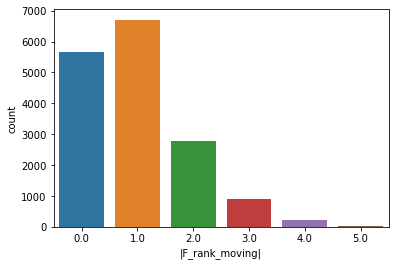

In [ ]:
# | F_rank_moving | 분포 - 절대값
print(F_rank['|F_rank_moving|'].value_counts())
sns.countplot('|F_rank_moving|',data = F_rank)


 0.0    5649
-1.0    3711
 1.0    2994
-2.0    1565
 2.0    1227
-3.0     491
 3.0     412
-4.0     147
 4.0      71
-5.0      28
Name: F_rank_moving, dtype: int64


<AxesSubplot:xlabel='F_rank_moving', ylabel='count'>

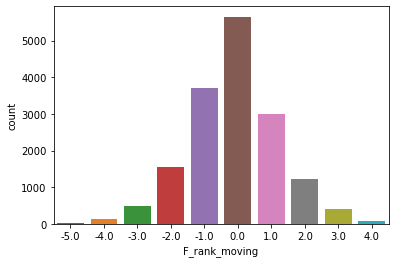

In [ ]:
# | F_rank_moving | 분포 - 증감
print(F_rank.F_rank_moving.value_counts())
sns.countplot('F_rank_moving',data = F_rank)

In [ ]:
# 구매변동(매출) 불러오기

M_rank = pd.read_pickle('dataset/M_rank.pkl')

In [ ]:
# 하나의 데이터 프레임으로
a = pd.merge(M_rank,F_rank, on = "CUSTNO" , how = 'left' )
a

,M_rank_14,M_rank_15,M_rank_moving,|M_rank_moving|,F_rank_14,F_rank_15,F_rank_moving,|F_rank_moving|
CUSTNO,,,,,,,,
14599,5,5.0,0.0,0.0,5,5.0,0.0,0.0
08994,5,3.0,-2.0,2.0,5,4.0,-1.0,1.0
17129,5,5.0,0.0,0.0,5,5.0,0.0,0.0
00562,5,5.0,0.0,0.0,5,4.0,-1.0,1.0
09136,5,5.0,0.0,0.0,5,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12503,1,4.0,3.0,3.0,1,2.0,1.0,1.0
16763,1,1.0,0.0,0.0,1,1.0,0.0,0.0
06930,1,1.0,0.0,0.0,1,1.0,0.0,0.0


In [ ]:
a.to_pickle('dataset/rank_moving_all')